<a href="https://colab.research.google.com/github/Namesakenberg/Olympic_Data_Analysis/blob/main/Olympics_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/athlete_events.csv')
region_df=pd.read_csv('/content/noc_regions (2).csv')

# Exploratory data analysis

## Find number of medals won by countries in total and in a particular year

In [ ]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
df.shape

(271116, 15)

In [ ]:
df_tot=df

In [ ]:
# get only the data of summer

df=df.loc[df['Season']=='Summer']

In [ ]:
df.shape

(222552, 15)

In [ ]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [ ]:
region_df.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [ ]:
# merge the datsets
df=df.merge(region_df,on='NOC',how="left")
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN  

[222552 rows x 17 columns]

In [ ]:
df['region'].unique().shape


(206,)

In [ ]:
#counting the null values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [ ]:
df.duplicated().sum()

1385

In [ ]:
df['Medal'].value_counts()

Medal
Gold      11459
Bronze    11409
Silver    11220
Name: count, dtype: int64

In [ ]:
medal_distribution=pd.get_dummies(df['Medal'],dtype=int)
medal_distribution

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[222552 rows x 3 columns]

In [ ]:
df=pd.concat([df,pd.get_dummies(df['Medal'],dtype=int)],axis=1)
# new columns added to the dataset

In [ ]:
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze  Gold  Silver  
0        NaN       0     0       0  
1        NaN       0     0       0  
2        NaN       0     0       0  
3        NaN       0     1       0  
4        NaN       0     0       0  
...      ...     ...   ...     ...  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0  

[222552 rows x 20 columns]

In [ ]:
# calulate the number of medals of every country
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   636     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [ ]:
# the numbers above are wrong when checked with google
# this is because the medal count is based on the individual performance and medal count
# hence for every team sport medal the value is considered 11

In [ ]:
# to do so remove the duplicates in columns :- team,NOC,Games,Year,Sport,event
medal_tally=df.drop_duplicates(subset=['Team','Sport','Event','NOC','Year','City','Games','Medal'])

In [ ]:
medal_tally_yearly=df.drop_duplicates(subset=['Team','Sport','Event','NOC','Year','City','Games','Medal'])

In [ ]:
medal_tally

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  
222536       Poland   NaN       0     0       0  
222537       Poland   NaN       0     0       0  
222541       Greece   NaN       0     0       0  

[105636 rows x 20 columns]

In [ ]:
medal_tally=medal_tally.groupby(['NOC']).sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [ ]:
medal_tally_yearly=medal_tally_yearly.groupby(['NOC','Year']).sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [ ]:
medal_tally

NOC  Gold  Silver  Bronze
0    USA  1035     802     708
1    URS   394     317     294
2    GBR   278     317     300
3    GER   235     261     283
4    FRA   234     256     287
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [ ]:
medal_tally[medal_tally['NOC']=='IND']

NOC  Gold  Silver  Bronze
53  IND     9       7      12

In [ ]:
# get total medal count for every country
medal_tally['total']=medal_tally['Bronze']+medal_tally['Silver']+medal_tally['Gold']

In [ ]:
medal_tally_yearly['total']=medal_tally_yearly['Bronze']+medal_tally_yearly['Silver']+medal_tally_yearly['Gold']

In [ ]:
medal_tally

NOC  Gold  Silver  Bronze  total
0    USA  1035     802     708   2545
1    URS   394     317     294   1005
2    GBR   278     317     300    895
3    GER   235     261     283    779
4    FRA   234     256     287    777
..   ...   ...     ...     ...    ...
225  AHO     0       1       0      1
226  LBR     0       0       0      0
227  LCA     0       0       0      0
228  LES     0       0       0      0
229  LBA     0       0       0      0

[230 rows x 5 columns]

In [ ]:
import plotly.express as px

fig = px.bar(
    medal_tally,
    x='NOC',
    y=['Gold', 'Silver', 'Bronze'],
    color_discrete_sequence=['gold', 'silver', 'brown'],
    title='Number of medals',
    height=500,  # Adjust the height as needed
    width=4000   # Adjust the width as needed
)

fig.show()


In [ ]:
# make ranking wrt to year
# like show standings in 2016

In [ ]:
medal_tally_yearly=medal_tally_yearly.sort_values(['Year','total'],ascending=False)

In [ ]:
medal_tally_yearly

NOC  Year  Gold  Silver  Bronze  total
9     USA  2016    46      37      38    121
47    CHN  2016    26      18      26     70
44    GBR  2016    27      23      17     67
59    RUS  2016    19      17      20     56
66    GER  2016    17      10      15     42
...   ...   ...   ...     ...     ...    ...
519   AUT  1896     2       1       2      5
582   AUS  1896     2       0       1      3
735   SUI  1896     1       2       0      3
1233  SWE  1896     0       0       0      0
2324  ITA  1896     0       0       0      0

[2810 rows x 6 columns]

In [ ]:


# Filter the data to include only rows where the Year is 2016
medal_tally_2016 = medal_tally_yearly[medal_tally_yearly['Year'] == 2016]

# Create the bar plot
fig = px.bar(
    medal_tally_2016,  # Use the filtered DataFrame
    x='NOC',
    y=['Gold', 'Silver', 'Bronze'],
    color_discrete_sequence=['gold', 'silver', 'brown'],
    title='Number of medals in 2016',
    height=500,  # Adjust the height as needed
    width=4000   # Adjust the width as needed
)

fig.show()



# Athlete's overall performance and performace in a particular event in a year

In [ ]:
athlete_performance_overall=(df.groupby(['NOC','Name','Sport']).sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index())
athlete_performance_overall['Total']=athlete_performance_overall['Gold']+athlete_performance_overall['Silver']+athlete_performance_overall['Bronze']
athlete_performance_overall

NOC                            Name      Sport  Gold  Silver  Bronze  \
0       USA         Michael Fred Phelps, II   Swimming    23       3       2   
1       USA     Raymond Clarence "Ray" Ewry  Athletics    10       0       0   
2       USA  Frederick Carlton "Carl" Lewis  Athletics     9       1       0   
3       FIN            Paavo Johannes Nurmi  Athletics     9       3       0   
4       USA               Mark Andrew Spitz   Swimming     9       1       1   
...     ...                             ...        ...   ...     ...     ...   
118639  FRG                Thomas Hitzbleck     Rowing     0       0       0   
118640  FRG                    Thomas Happe   Handball     0       1       0   
118641  FRG                    Thomas Gunst     Hockey     0       1       0   
118642  FRG                 Thomas Giessing  Athletics     0       0       0   
118643  ZIM                 Zephaniah Ncube  Athletics     0       0       0   

        Total  
0          28  
1          10  
2          10  
3          12  
4          11  
...       ...  
118639      0  
118640      1  
118641      1  
118642      0  
118643      0  

[118644 rows x 7 columns]

In [ ]:
athlete_performance_event=(
    df.groupby(['NOC', 'Name', 'Sport', 'Event', 'Year'])
    .sum()[['Gold', 'Silver', 'Bronze']]
    .sort_values(['Gold', 'Year'], ascending=[False, True])
    .reset_index()
)
athlete_performance_event['Total']=athlete_performance_event['Gold']+athlete_performance_event['Silver']+athlete_performance_event['Bronze']


In [ ]:
athlete_performance_event[
    (athlete_performance_event['Name'] == 'Michael Fred Phelps, II') &
    (athlete_performance_event['Event'] == "Swimming Men's 100 metres Butterfly")
].sort_values('Year', ascending=True)


NOC                     Name     Sport  \
9445    USA  Michael Fred Phelps, II  Swimming   
10108   USA  Michael Fred Phelps, II  Swimming   
10749   USA  Michael Fred Phelps, II  Swimming   
220654  USA  Michael Fred Phelps, II  Swimming   

                                      Event  Year  Gold  Silver  Bronze  Total  
9445    Swimming Men's 100 metres Butterfly  2004     1       0       0      1  
10108   Swimming Men's 100 metres Butterfly  2008     1       0       0      1  
10749   Swimming Men's 100 metres Butterfly  2012     1       0       0      1  
220654  Swimming Men's 100 metres Butterfly  2016     0       1       0      1

In [ ]:
athlete_performance_overall[athlete_performance_overall['Name']=='Michael Fred Phelps, II']

NOC                     Name     Sport  Gold  Silver  Bronze  Total
0  USA  Michael Fred Phelps, II  Swimming    23       3       2     28

In [ ]:
# graph for personal analysis

# Filter data for a specific athlete and event
athlete_data = athlete_performance_event[
    (athlete_performance_event['Name'] == 'Michael Fred Phelps, II') &
    (athlete_performance_event['Event'] == "Swimming Men's 100 metres Butterfly")
]

# Create the line plot with custom colors for each medal type
fig = px.line(
    athlete_data,
    x='Year',
    y=['Gold', 'Silver', 'Bronze'],
    title='Performance of Michael Fred Phelps, II in Swimming Men\'s 100 Metres Butterfly Over the Years',
    labels={'value': 'Medal Count', 'variable': 'Medal Type'},
    markers=True,
    color_discrete_map={
        'Gold': 'gold',
        'Silver': 'silver',
        'Bronze': 'brown',
        'Total': 'blue'  # Optional: color for total, adjust as needed
    }
)

# Update the x-axis to show every 4 years
fig.update_xaxes(
    dtick=4,  # Set the tick interval to 4 years
    tickmode='linear'  # Ensure that the ticks are set in a linear manner
)

# Show the plot
fig.show()



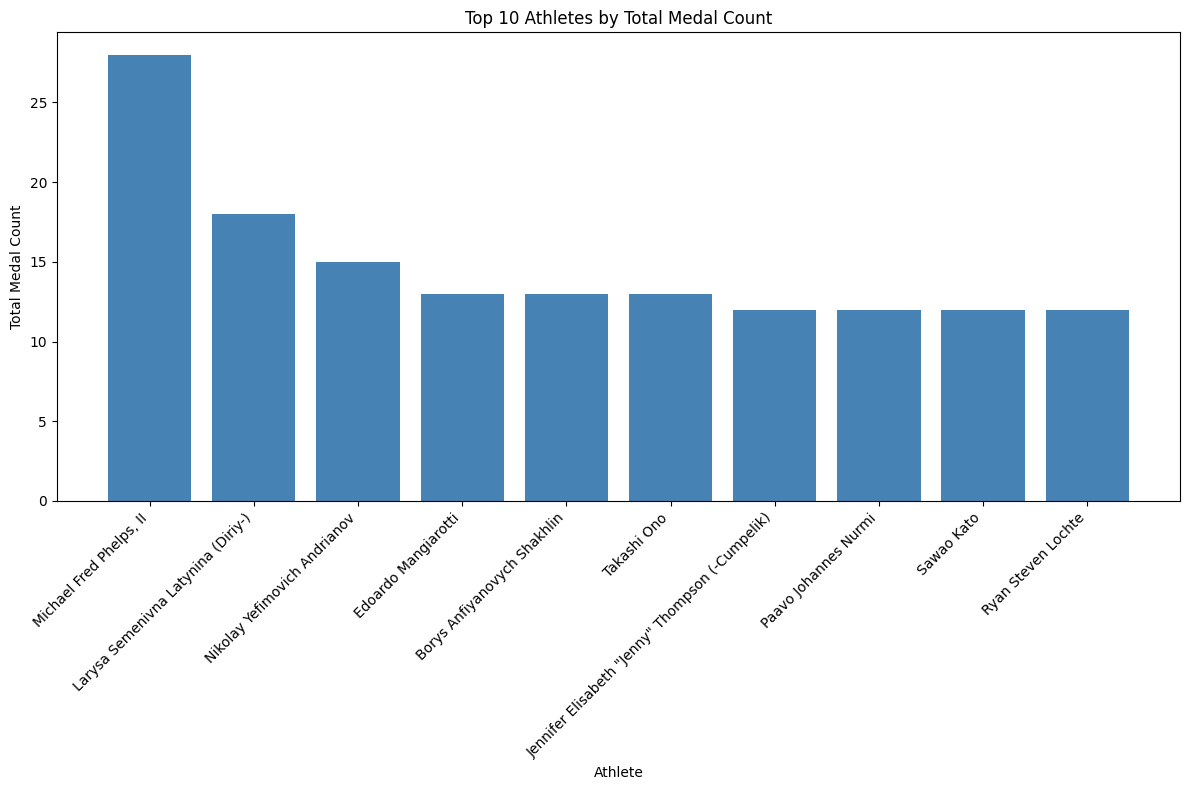

In [ ]:
import matplotlib.pyplot as plt

# Sort the data by Total medal count in descending order
athlete_performance_overall = athlete_performance_overall.sort_values('Total', ascending=False)

# Plot the top 10 athletes by total medal count
plt.figure(figsize=(12, 8))
plt.bar(athlete_performance_overall['Name'][:10], athlete_performance_overall['Total'][:10], color='steelblue')

# Customize the plot
plt.xlabel('Athlete')
plt.ylabel('Total Medal Count')
plt.title('Top 10 Athletes by Total Medal Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()



In [ ]:
# Group by 'Sport' and 'Year', then sum the medal counts
medals_per_sport_year = (
    df.groupby(['Sport','Name','Year'])
    .sum()[['Gold', 'Silver', 'Bronze']]
    .sort_values(['Gold', 'Year'], ascending=[False, True])  # Sort by 'Gold' (descending) and 'Year' (ascending)
    .reset_index()
)

# Display the resulting DataFrame
medals_per_sport_year


Sport                           Name  Year  Gold  Silver  Bronze
0         Swimming        Michael Fred Phelps, II  2008     8       0       0
1         Swimming              Mark Andrew Spitz  1972     7       0       0
2         Swimming                   Kristin Otto  1988     6       0       0
3       Gymnastics  Vitaly Venediktovich Shcherbo  1992     6       0       0
4         Swimming        Michael Fred Phelps, II  2004     6       0       2
...            ...                            ...   ...   ...     ...     ...
159229   Wrestling                  Zsanett Nmeth  2016     0       0       0
159230   Wrestling            Zurabi Datunashvili  2016     0       0       0
159231   Wrestling            Zurabi Iakobishvili  2016     0       0       0
159232   Wrestling                   brahim Blkba  2016     0       0       0
159233   Wrestling                      rif rifov  2016     0       0       1

[159234 rows x 6 columns]

#  Input the sport and get the athlete with most medals

In [ ]:
sport=input('enter the sport : ')
sport=sport.capitalize()
if sport not in df['Sport'].unique():
  print("Sport not found")
  exit()
dataframe = df[df['Sport']==sport].copy()
dataframe = dataframe.dropna(subset=['Medal'])  # remove the people with no medals
def most_sucessful(dataframe,sport):
  medals_per_sport_year = (
    dataframe.groupby(['Sport','Name','Year'])
    .sum()[['Gold', 'Silver', 'Bronze']]
    .sort_values(['Gold', 'Year'], ascending=[False, True])  # Sort by 'Gold' (descending) and 'Year' (ascending)
    .reset_index()
  )
  return medals_per_sport_year

most_sucessful(dataframe,sport)


# The first letter of the sport should be in

enter the sport : swimming


Sport                            Name  Year  Gold  Silver  Bronze
0     Swimming         Michael Fred Phelps, II  2008     8       0       0
1     Swimming               Mark Andrew Spitz  1972     7       0       0
2     Swimming                    Kristin Otto  1988     6       0       0
3     Swimming         Michael Fred Phelps, II  2004     6       0       2
4     Swimming  Matthew Nicholas "Matt" Biondi  1988     5       1       1
...        ...                             ...   ...   ...     ...     ...
2047  Swimming                 William Meynard  2016     0       1       0
2048  Swimming                        Xu Jiayu  2016     0       1       0
2049  Swimming      Yevgeny Mikhaylovich Rylov  2016     0       0       1
2050  Swimming                     Yuki Kobori  2016     0       0       1
2051  Swimming      Yuliya Andreyevna Yefimova  2016     0       2       0

[2052 rows x 6 columns]

#Olympic Games Participation and Event Insights

1) no. of editions

2) no of cities

3) no of events/sports

4) no of athletes

5) participating nations

In [ ]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
# 1) particular year and city where the Olympic Games were held.

#)ascending : year -> Country -> city -> season
df_tot.tail(5)

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [ ]:
df_tot.sort_values('Year',ascending=True)

ID                         Name Sex   Age  Height  Weight  \
214333  107607  Fritz Richard Gustav Schuft   M  19.0     NaN     NaN   
244717  122526      Pierre Alexandre Tuffri   M  19.0     NaN     NaN   
244716  122526      Pierre Alexandre Tuffri   M  19.0     NaN     NaN   
23912    12563    Conrad Helmut Fritz Bcker   M  25.0     NaN     NaN   
23913    12563    Conrad Helmut Fritz Bcker   M  25.0     NaN     NaN   
...        ...                          ...  ..   ...     ...     ...   
142355   71419     Luis Fernando Lpez Erazo   M  37.0   166.0    60.0   
47729    24610             Enrico D'Aniello   M  20.0   152.0    53.0   
47728    24609             Sabrina D'Angelo   F  23.0   173.0    71.0   
47746    24621     Andrea Mitchell D'Arrigo   M  21.0   194.0    85.0   
236646  118650                Blair Tarrant   M  26.0   185.0    83.0   

               Team  NOC        Games  Year  Season            City  \
214333      Germany  GER  1896 Summer  1896  Summer          Athina   
244717       France  FRA  1896 Summer  1896  Summer          Athina   
244716       France  FRA  1896 Summer  1896  Summer          Athina   
23912       Germany  GER  1896 Summer  1896  Summer          Athina   
23913       Germany  GER  1896 Summer  1896  Summer          Athina   
...             ...  ...          ...   ...     ...             ...   
142355     Colombia  COL  2016 Summer  2016  Summer  Rio de Janeiro   
47729         Italy  ITA  2016 Summer  2016  Summer  Rio de Janeiro   
47728        Canada  CAN  2016 Summer  2016  Summer  Rio de Janeiro   
47746         Italy  ITA  2016 Summer  2016  Summer  Rio de Janeiro   
236646  New Zealand  NZL  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                Event   Medal  
214333  Gymnastics     Gymnastics Men's Pommelled Horse     NaN  
244717   Athletics          Athletics Men's Triple Jump  Silver  
244716   Athletics            Athletics Men's Long Jump     NaN  
23912   Gymnastics         Gymnastics Men's Horse Vault     NaN  
23913   Gymnastics       Gymnastics Men's Parallel Bars     NaN  
...            ...                                  ...     ...  
142355   Athletics   Athletics Men's 20 kilometres Walk     NaN  
47729       Rowing            Rowing Men's Coxed Eights     NaN  
47728     Football            Football Women's Football  Bronze  
47746     Swimming  Swimming Men's 200 metres Freestyle     NaN  
236646      Hockey                  Hockey Men's Hockey     NaN  

[271116 rows x 15 columns]

In [ ]:
# Keep only relevant columns
olympic_editions = df_tot[['Year', 'City', 'Season']]

# Sort the dataset by Year
olympic_editions = olympic_editions.sort_values(by='Year')

#  Drop duplicate rows to find unique Olympic editions
olympic_editions = olympic_editions.drop_duplicates()

#  Reset index for a cleaner view
olympic_editions = olympic_editions.reset_index(drop=True)

# Display the unique Olympic editions
olympic_editions


Year                    City  Season
0   1896                  Athina  Summer
1   1900                   Paris  Summer
2   1904               St. Louis  Summer
3   1906                  Athina  Summer
4   1908                  London  Summer
5   1912               Stockholm  Summer
6   1920               Antwerpen  Summer
7   1924                   Paris  Summer
8   1924                Chamonix  Winter
9   1928               Amsterdam  Summer
10  1928            Sankt Moritz  Winter
11  1932             Los Angeles  Summer
12  1932             Lake Placid  Winter
13  1936                  Berlin  Summer
14  1936  Garmisch-Partenkirchen  Winter
15  1948            Sankt Moritz  Winter
16  1948                  London  Summer
17  1952                Helsinki  Summer
18  1952                    Oslo  Winter
19  1956               Melbourne  Summer
20  1956       Cortina d'Ampezzo  Winter
21  1956               Stockholm  Summer
22  1960                    Roma  Summer
23  1960            Squaw Valley  Winter
24  1964                   Tokyo  Summer
25  1964               Innsbruck  Winter
26  1968                Grenoble  Winter
27  1968             Mexico City  Summer
28  1972                  Munich  Summer
29  1972                 Sapporo  Winter
30  1976                Montreal  Summer
31  1976               Innsbruck  Winter
32  1980             Lake Placid  Winter
33  1980                  Moskva  Summer
34  1984             Los Angeles  Summer
35  1984                Sarajevo  Winter
36  1988                   Seoul  Summer
37  1988                 Calgary  Winter
38  1992               Barcelona  Summer
39  1992             Albertville  Winter
40  1994             Lillehammer  Winter
41  1996                 Atlanta  Summer
42  1998                  Nagano  Winter
43  2000                  Sydney  Summer
44  2002          Salt Lake City  Winter
45  2004                  Athina  Summer
46  2006                  Torino  Winter
47  2008                 Beijing  Summer
48  2010               Vancouver  Winter
49  2012                  London  Summer
50  2014                   Sochi  Winter
51  2016          Rio de Janeiro  Summer

In [ ]:
unique_olympic_editions = olympic_editions.drop_duplicates()

number_summer = unique_olympic_editions[unique_olympic_editions['Season'] == 'Summer'].nunique().value_counts
number_winter = unique_olympic_editions[unique_olympic_editions['Season'] == 'Winter'].nunique().value_counts
print("Number of Summer Olympic editions:", number_summer)
print("Number of Winter Olympic editions:", number_winter)


Number of Summer Olympic editions: <bound method IndexOpsMixin.value_counts of Year      29
City      23
Season     1
dtype: int64>
Number of Winter Olympic editions: <bound method IndexOpsMixin.value_counts of Year      22
City      19
Season     1
dtype: int64>


In [ ]:
unique_summer_years = olympic_editions[olympic_editions['Season'] == 'Summer']['Year'].unique()
(unique_summer_years)

# olympics happens after every 4 years but after 1904 we can see that it happend again in i906
# also according to google 1906 is not considered as olympics

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1996, 2000, 2004, 2008, 2012, 2016])

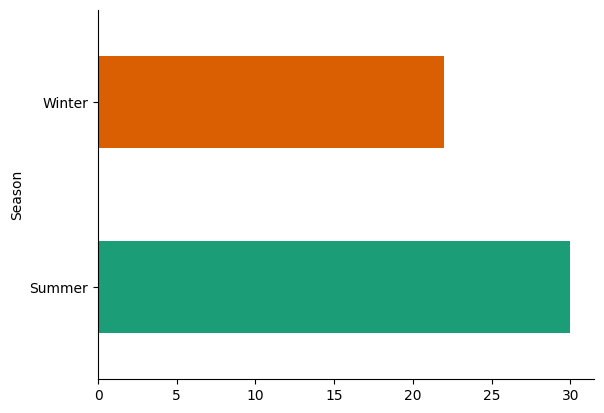

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
olympic_editions.groupby('Season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# number of cities where olympics took place
cities_played_summer = olympic_editions[olympic_editions['Season'] =='Summer']['City'].nunique()
cities_played_winter=olympic_editions[olympic_editions['Season']=='Winter']['City'].nunique()
print("cities in which the summer olympicss were held : ",cities_played_summer)
print("cities in which the winter olympics were held : ",cities_played_winter)

cities in which the summer olympicss were held :  23
cities in which the winter olympics were held :  19


In [ ]:
# number of sports and events held
print("Number of Events : ",df['Event'].nunique())
print("Number of sports : ",df['Sport'].nunique())

Number of Events :  651
Number of sports :  52


In [ ]:
region_df['region'].nunique()

206

In [ ]:
# no. of countries participated:
print("Number of countries participated : ",df['region'].nunique())

Number of countries participated :  205


In [ ]:
#  no of athletes participated
print(" no of athletes : ",df['Name'].nunique())

 no of athletes :  116122


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222552 entries, 0 to 222551
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222552 non-null  int64  
 1   Name    222552 non-null  object 
 2   Sex     222552 non-null  object 
 3   Age     213363 non-null  float64
 4   Height  170695 non-null  float64
 5   Weight  168698 non-null  float64
 6   Team    222552 non-null  object 
 7   NOC     222552 non-null  object 
 8   Games   222552 non-null  object 
 9   Year    222552 non-null  int64  
 10  Season  222552 non-null  object 
 11  City    222552 non-null  object 
 12  Sport   222552 non-null  object 
 13  Event   222552 non-null  object 
 14  Medal   34088 non-null   object 
 15  region  222182 non-null  object 
 16  notes   4401 non-null    object 
 17  Bronze  222552 non-null  int64  
 18  Gold    222552 non-null  int64  
 19  Silver  222552 non-null  int64  
dtypes: float64(3), int64(5), object(12)
memory usage

In [ ]:
yearly_participation = (
    df.groupby('Year')['region'].nunique().reset_index(name='Number of Nations')
)
yearly_participation.head(10)

Year  Number of Nations
0  1896                 12
1  1900                 31
2  1904                 14
3  1906                 20
4  1908                 22
5  1912                 28
6  1920                 29
7  1924                 45
8  1928                 46
9  1932                 47

In [ ]:

fig = px.line(
    yearly_participation,
    x='Year',
    y='Number of Nations',
    title='Number of Participating Nations Every Year',
    labels={'Year': 'Year', 'Number of Nations': 'Number of Participating Nations'},
    markers=True
)

# Update the x-axis to show every 4 years
fig.update_xaxes(
    dtick=4,  # Set the tick interval to 4 years
    tickmode='linear'  # Ensure ticks are set linearly
)

# Show the plot
fig.show()


In [ ]:
#  graph of Number of Events held

yearly_held_events=(df.groupby('Year')['Event'].nunique().reset_index(name='Number of events held every year'))
yearly_held_events.head(10)

Year  Number of events held every year
0  1896                                43
1  1900                                90
2  1904                                95
3  1906                                74
4  1908                               109
5  1912                               107
6  1920                               158
7  1924                               131
8  1928                               122
9  1932                               131

In [ ]:
fig = px.line(
    yearly_held_events,
    x='Year',
    y='Number of events held every year',
    title='Number of Events held  Every Year',
    labels={'Year': 'Year', 'Number of Events': 'Number of Events held'},
    markers=True
)

# Update the x-axis to show every 4 years
fig.update_xaxes(
    dtick=4,  # Set the tick interval to 4 years
    tickmode='linear'  # Ensure ticks are set linearly
)

# Show the plot
fig.show()


In [ ]:
 # graph for yearly participating athletes
yearly_athletes = (df.groupby('Year')['Name'].nunique().reset_index(name='Number of athletes participated'))



In [ ]:
fig = px.line(
    yearly_athletes,
    x='Year',
    y='Number of athletes participated',
    title='Number of athletes participated',
    labels={'Year': 'Year', 'Number of Events': 'Number of athletes participated'},
    markers=True
)

# Update the x-axis to show every 4 years
fig.update_xaxes(
    dtick=4,  # Set the tick interval to 4 years
    tickmode='linear'  # Ensure ticks are set linearly
)

# Show the plot
fig.show()


In [ ]:
# heatmap to plot number of events held in a particular sport

In [ ]:
event_per_sport=df.groupby(['Sport','Year'])['Event'].nunique().reset_index(name='Number of events held per sport')
event_per_sport.sort_values(by='Number of events held per sport',ascending=False)

Sport  Year  Number of events held per sport
53     Athletics  2012                               47
54     Athletics  2016                               47
52     Athletics  2008                               47
50     Athletics  2000                               46
51     Athletics  2004                               46
..           ...   ...                              ...
328       Hockey  1948                                1
329       Hockey  1952                                1
330       Hockey  1956                                1
331       Hockey  1960                                1
0    Aeronautics  1936                                1

[672 rows x 3 columns]

# Overall Analysis of the events held under the sports played for 120 years

<Axes: xlabel='Year', ylabel='Sport'>

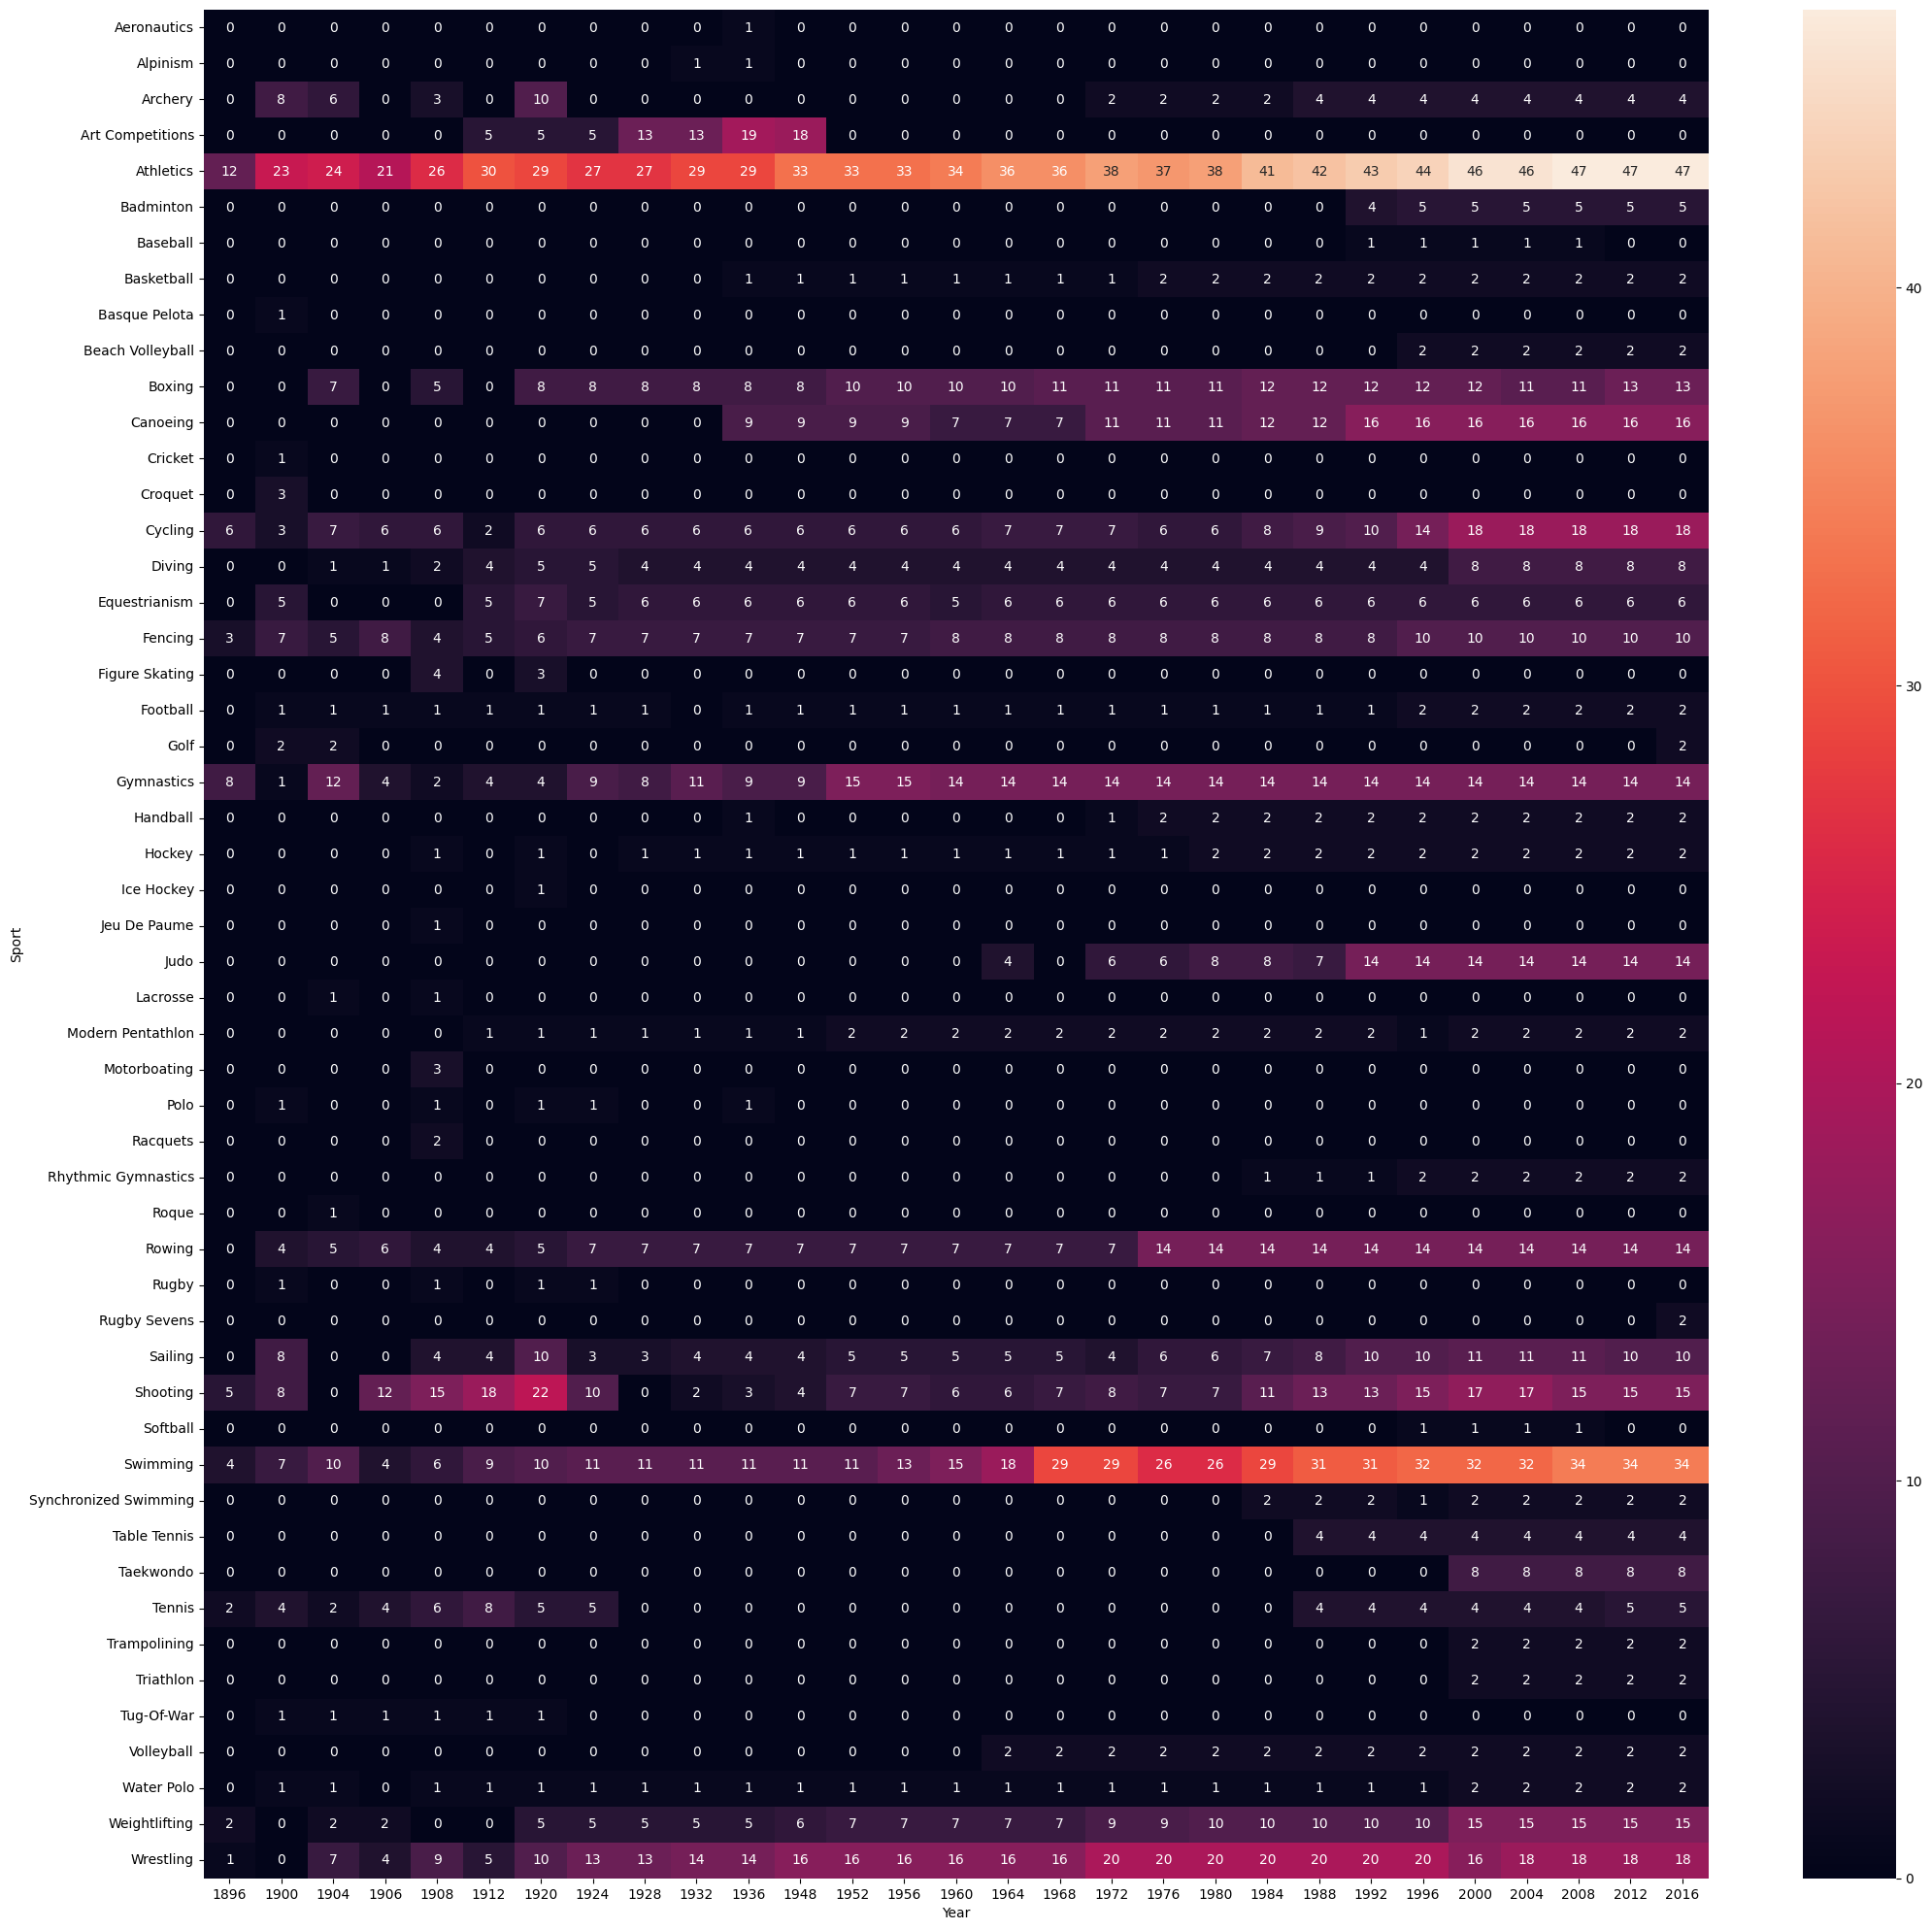

In [ ]:
event_per_sport=df.groupby(['Sport','Year'])['Event'].nunique().reset_index(name='Number of events held per sport')
event_per_sport
plt.figure(figsize=(25,25))
sns.heatmap(event_per_sport.pivot_table(index='Sport',columns='Year',values='Number of events held per sport',aggfunc='sum').fillna(0).astype('int'),annot=True)

# Athlete Analysis

In [ ]:
# probability density function for athlete's age
import plotly.figure_factory as ff
# drop duplicates
athlete_info = df[['Name','Sex','Age','Height','Weight','NOC','Gold','Silver','Bronze','Sport']].copy()
athlete_info=athlete_info.drop_duplicates()
athlete_info.sort_values(by='Age')

Name Sex   Age  Height  Weight  NOC  \
117228                  Dimitrios Loundras   M  10.0     NaN     NaN  GRE   
61296      Carlos Bienvenido Front Barrera   M  11.0     NaN     NaN  ESP   
65895                     Luigina Giavotti   F  11.0     NaN     NaN  ITA   
207282                        Liana Vicens   F  11.0   158.0    50.0  PUR   
122310  Luciana Marcellini Hercolani Gaddi   F  12.0   163.0    58.0  ITA   
...                                    ...  ..   ...     ...     ...  ...   
222256                   Antonio A. Zucchi   M   NaN     NaN     NaN  ARG   
222338                           Star Zulu   M   NaN     NaN     NaN  ZAM   
222357                        Max Zumstein   M   NaN     NaN     NaN  SUI   
222365                  Edmundo Ziga Erraz   M   NaN   180.0    95.0  CHI   
222366                          Faelo Ziga   M   NaN     NaN     NaN  CHI   

        Gold  Silver  Bronze       Sport  
117228     0       0       1  Gymnastics  
61296      0       0       0      Rowing  
65895      0       1       0  Gymnastics  
207282     0       0       0    Swimming  
122310     0       0       0    Swimming  
...      ...     ...     ...         ...  
222256     0       0       0      Hockey  
222338     0       0       0      Boxing  
222357     0       0       0      Hockey  
222365     0       0       0   Athletics  
222366     0       0       0    Swimming  

[167699 rows x 10 columns]

In [ ]:
# Filter data for Gold, Silver, and Bronze medalists
gold_athletes = athlete_info[athlete_info['Gold'] > 0]['Age'].dropna()
silver_athletes = athlete_info[athlete_info['Silver'] > 0]['Age'].dropna()
bronze_athletes = athlete_info[athlete_info['Bronze'] > 0]['Age'].dropna()

# Get the total age distribution
all_athletes = athlete_info['Age'].dropna()

# Create the PDF plot
fig = ff.create_distplot(
    [all_athletes, gold_athletes, silver_athletes, bronze_athletes],  # List of datasets
    group_labels=["All Athletes", "Gold Medalists", "Silver Medalists", "Bronze Medalists"],  # Labels
    show_hist=False,  # Disable histogram
    show_rug=False    # Disable rug plot
)

# Customize colors for consistency
colors = ["#636EFA", "#FFD700", "#C0C0C0", "#CD7F32"]  # Blue for total, Gold, Silver, Bronze
for i, trace in enumerate(fig.data):
    trace.line.color = colors[i % len(colors)]

# Customize layout
fig.update_layout(
    title="Probability Density Function for Athletes' Age (Total and Medalists)",
    xaxis_title="Age",
    yaxis_title="Density"
)

# Show the plot
fig.show()



In [ ]:
# graph for height and weight for a particular sport
physical=df[['Sport','Height','Weight']].copy()

In [ ]:
# Create the scatter plot
fig = px.scatter(
    athlete_info,
    x='Height',  # Height on the x-axis
    y='Weight',  # Weight on the y-axis
    color='Sport',  # Differentiate by sport
    title="Height vs Weight of Players by Sport",
    labels={"Height": "Height (cm)", "Weight": "Weight (kg)"},
    hover_data=['Name', 'Sex']  # Optional: Display player name and sex on hover
)

# Customize the layout
fig.update_layout(
    xaxis_title="Height (cm)",
    yaxis_title="Weight (kg)",
    legend_title="Sport",
    template="plotly"
)

# Show the plot
fig.show()
